## Cardiovascular Disease Prediction

* Introduction
* Import Modules
* Data Cleaning and EDA
    * Checking Duplication and Missed Values  
    * Visualization
        Detecting Outliers
* Feature Engineering
* Model Selection
    * Training and Test Sets
    * Data Normalization
    * Model Comparison
    * K Fold Cross Validation
    * Grid Search
* Model Evaluation
    * Test Set Accuracy Score
    * Confusion Matrix
    * F1 Score Calculation
* ANN Aproach 
* Conclusion

## INTRODUCTION

<hr>
Dataset link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset


We have a nice data set that includes patient characteristics and a label about cardiovascular diseases.
    
Then what we have in our kernel;
* Dropping irrevelant feature
* Handling outliers of high blood pressure 
* Adding Body Mess Index as a new feature (Feature Engineering)
* Comparison of Classification Models
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * K Nearest Neighbors (KNN)
    * Suppor Vector Machine (SVM)
    * Naive Bayes
* K Fold Cross Validation to prevent overfitting data
* Grid Search algorithm for finding the best hyperparameters for the winning classification algorithm by 
* Calculating Precision, Recall and F1 scores for measuring the success with another evaluation metric

### **Import Modules** 


In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import os

### **Data Cleaning and EDA**

In [31]:
data_raw = pd.read_csv("Cardiovascular_Disease_dataset.csv", sep=";")
data_raw.head()
df=data_raw.describe()
df.to_csv('cardio.csv')

In [32]:
data_raw.gender[data_raw.gender == 1] = 1
data_raw.gender[data_raw.gender == 2] = 0
data_raw['age'] = round(data_raw['age'] / 365)

<ipython-input-32-4d4506c632e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw.gender[data_raw.gender == 1] = 1
<ipython-input-32-4d4506c632e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw.gender[data_raw.gender == 2] = 0


In [33]:
data_raw.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,53.0,0,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,0,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,56.0,1,170,72.0,120,80,2,1,0,0,1,0


In [34]:
data_raw.shape

(70000, 13)

In [35]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


In [36]:
data_raw.drop("id",axis=1,inplace=True)


### **Checking Duplication and Missing Values** 

In [37]:
data_raw.duplicated().sum()

3816

In [38]:
#We can drop the duplicates because they have no any effect of training of model.
#Firstly let us see the duplicated rows with eyes.

duplicated = data_raw[data_raw.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
duplicated.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
48386,65.0,1,168,64.0,120,80,1,1,0,0,0,1
69356,65.0,1,168,64.0,120,80,1,1,0,0,0,1


In [39]:
data_raw.drop_duplicates(inplace=True)
data_raw.duplicated().sum()

0

### **Visualization**

### Detecting Outliers


In [40]:
x = data_raw.copy(deep=True)
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000
mean,53.365209,0.642769,164.345114,74.579057,129.304938,97.607186,1.385985,1.238169,0.092772,0.056751,0.797625,0.513614
std,6.807710,0.479187,8.353877,14.613279,158.368179,193.782532,0.692229,0.584137,0.290114,0.231368,0.401773,0.499818
min,30.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,1.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Standart Scalar Function

In [41]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
x_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.494323,0,0.437508,-0.860796,-0.121899,-0.090861,1,1,0,0,1,0
1,0.240138,1,-0.998951,0.713115,0.067533,-0.039256,3,1,0,0,1,1
2,-0.200539,1,0.078393,-0.723934,0.004389,-0.142465,3,1,0,0,0,1
3,-0.788108,0,0.557213,0.507822,0.130677,0.012348,1,1,0,0,1,1
4,-0.788108,1,-0.998951,-1.271382,-0.185043,-0.194069,1,1,0,0,0,0


In [42]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted.head()

,cardio,features,value
0,0,age,-0.494323
1,1,age,0.240138
2,1,age,-0.200539
3,1,age,-0.788108
4,0,age,-0.788108


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'height'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'ap_hi'),
  Text(4, 0, 'ap_lo')])

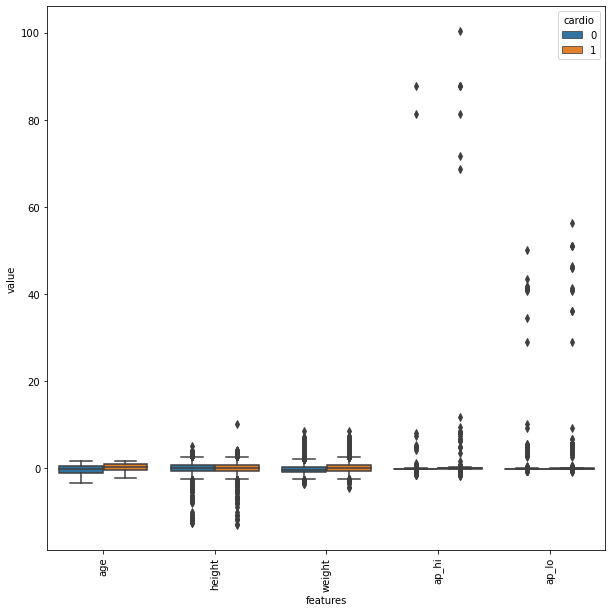

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)

In [44]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = x[each].quantile(0.25)
    Q3 = x[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


* We can select the index of outlier data by using boundaries we calculated.
* Normally we should analyze both upper outliers and below outliers but in this case, I consider to handle just uppers because of their extremely higher values.

In [45]:
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = x[outlier_filter]
x_outliers["cardio"].value_counts()


1    2025
0     388
Name: cardio, dtype: int64

* Cardiovascular disease is present in 83 percent of the  ap_hi and ap_lo outlier data,
* Because of ap_hi and ap_lo symbolizes high blood pressure, the high rate of disease is consistent with real life. 
* For this reason, I decided to drop just medically impossible data from the dataset.
* And I have dropped some of data because we have sufficent data (70000) otherwise I would try to handle them by assigning new values.

<AxesSubplot:xlabel='cardio', ylabel='count'>

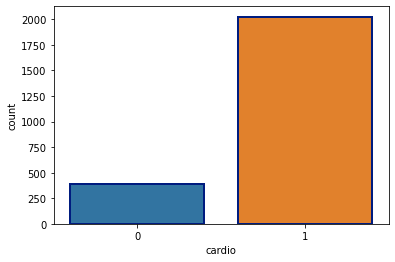

In [46]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

* I am not a doctor but with the little help of google I've learned some information about blood pressure,
* "If one’s systolic pressure (*ap_hi*) exceeds *180* or diastolic pressure (*ap_lo*) crosses *120*, it is a stage that requires immediate medical attention."


* A study published by doctors in NCBI NLM recorded a maximum blood pressure of 370/360 mm Hg. This study was performed by recording blood pressure in 10 male athletes through radial artery catheterization.
* Thus we can drop the ap_hi outlier values over 250 and ap_lo outlier values over 200, without fear of missing data.

In [47]:
out_filter = ((x["ap_hi"]>250) | (x["ap_lo"]>200) )
print("There is {} outlier".format(x[out_filter]["cardio"].count()))


There is 993 outlier


In [48]:
x = x[~out_filter]


<AxesSubplot:>

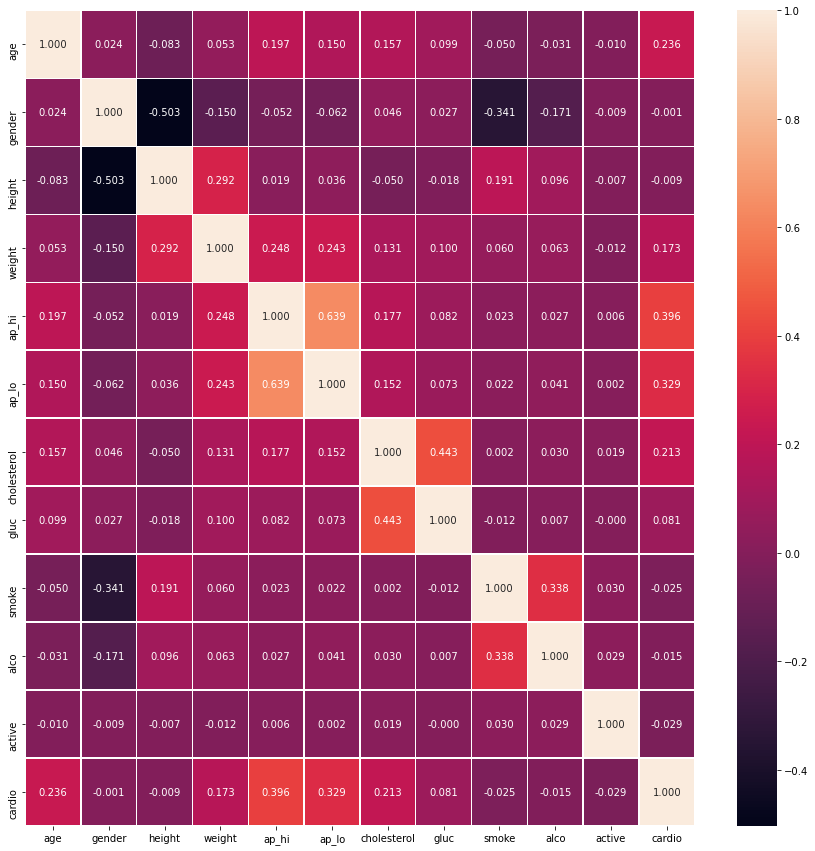

In [49]:
corr = x.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

* We can see from correlation map easily; cholesterol, blood pressure (ap_hi and ap_low both) and age have a powerful relationship with cardiovascular diseases.
* Glucogen and cholesterol have a strong relationship among them either.

### **Feature Engineering** 

### Body Mass Index Feature 
  
Height and weight seems uncorrelated with the cardio feature but Body Mass Index could be helpful to train our model.

In [50]:
def bmi_calc(w, h):
    return w/(h**2)

In [51]:
x["bmi"] = x["weight"]/ (x["height"]/100)**2

In [52]:
x.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
69995,53.0,0,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52.0,0,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251
69999,56.0,1,170,72.0,120,80,2,1,0,0,1,0,24.913495


* Detecting genders of patients

In [53]:
a = x[x["gender"]==1]["height"].mean()
b = x[x["gender"]==2]["height"].mean()
if a > b:
    gender = "male"
    gender2 = "female"
else:
    gender = "female"
    gender2 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender2)

Gender:1 is female & Gender:2 is male


In [54]:
x["gender"] = x["gender"] % 2

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

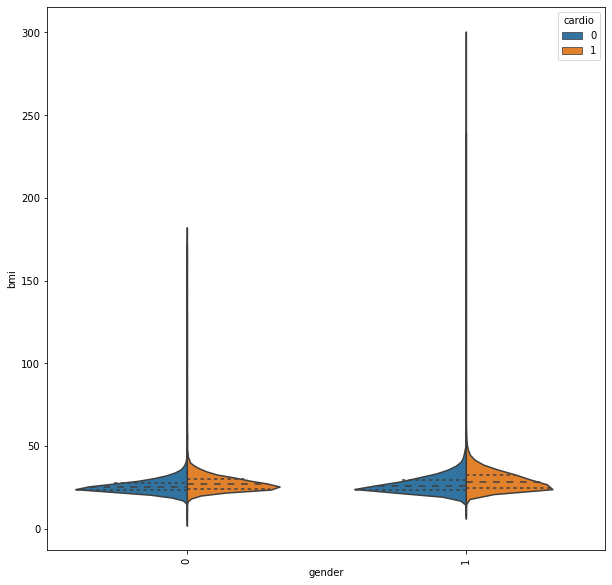

In [55]:
from sklearn.preprocessing import StandardScaler
x_std = standartization(x)

data = pd.melt(x_std,id_vars="cardio",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="gender", y="bmi", hue="cardio", data=x,split=True, inner="quart")
plt.xticks(rotation=90)

### **Model Selection** 
### Preparing the Training and Test Sets
Detecting outlier and handling them can increase our accuracy score.

To create a model first of all we will split our data to training and test set

In [56]:
y = x["cardio"]
y.shape

(65191,)

In [57]:
x.drop("cardio", axis=1,inplace=True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,50.0,0,168,62.0,110,80,1,1,0,0,1,21.967120
1,55.0,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,52.0,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,48.0,0,169,82.0,150,100,1,1,0,0,1,28.710479
4,48.0,1,156,56.0,100,60,1,1,0,0,0,23.011177


In [58]:
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
count,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000,65191.000000
mean,53.351061,0.643540,164.345293,74.491686,126.643310,81.427620,1.383627,1.237686,0.092559,0.056603,0.797058,27.671743
std,6.811729,0.478957,8.349651,14.548752,18.279946,10.123664,0.690843,0.583824,0.289815,0.231084,0.402193,6.192917
min,30.000000,0.000000,55.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.573129
75%,59.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.461118
max,65.000000,1.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,298.666667


In [59]:
print("\nInfo\n")
print(x.info())
print("\nMaximum\n")
print(x.max())
print("\nMinimum\n")
print(x.min())



Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65191 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65191 non-null  float64
 1   gender       65191 non-null  int64  
 2   height       65191 non-null  int64  
 3   weight       65191 non-null  float64
 4   ap_hi        65191 non-null  int64  
 5   ap_lo        65191 non-null  int64  
 6   cholesterol  65191 non-null  int64  
 7   gluc         65191 non-null  int64  
 8   smoke        65191 non-null  int64  
 9   alco         65191 non-null  int64  
 10  active       65191 non-null  int64  
 11  bmi          65191 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 8.5 MB
None

Maximum

age             65.000000
gender           1.000000
height         250.000000
weight         200.000000
ap_hi          240.000000
ap_lo          190.000000
cholesterol      3.000000
gluc             3.000000
smoke            1.0000

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


### Data Normalization

In [61]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

### Model Comparison 

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)
  


In [63]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.717846
KNN,0.716083
Random forest,0.696603
Naive bayes,0.694225
Decision tree,0.619756


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SVM'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random forest'),
  Text(3, 0, 'Naive bayes'),
  Text(4, 0, 'Decision tree')])

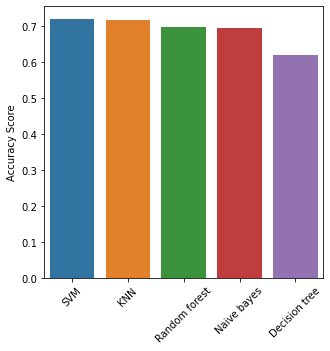

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45) # Rotation of Country names...

* It seems that KNN and Random Forest algorithms are far ahead of the others.
* So let's focus on these algorithms
 
### K Fold Cross Validation 
    
* With K-Fold cross-validation, we obtain "K" pieces of results from different mini-training sets from our main training set.
* Then we choose the average of these results as the actual result.
* After all, by taking the standard deviation of K result, we can examine whether the data is consistent.

In [37]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=x_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)

In [38]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.6960424742219529
Random Forest Standart Deviation:  0.005260022451093044
KNN Average accuracy:  0.7138174155485887
KNN Standart Deviation:  0.003544246298709288


The standard deviation value shows that we achieve consistent results.

### Grid Search

 Let us use grid search algorithm, in order to find the best Random Forest Algorithm's "n_estimators" hyperparameter value for our model, l

In [39]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(10,150,10)}

ran_cv = GridSearchCV(ran, grid, cv=3) # GridSearchCV
ran_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 
print("Best score: {}".format(ran_cv.best_score_))

Tuned hyperparameter n_estimators: {'n_estimators': 100}
Best score: 0.7022165976376744


In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} # (60,62,64 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))

C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Tuned hyperparameter n_estimators: {'C': 74, 'penalty': 'l1'}
Best score: 0.7220624328884799


C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Model Evaluation 
### Test Set Accuracy Score 
* Now we have selected our model with better hyper parameters than default ones.
* It is time to evaluate model with our test set

In [41]:
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))

Test accuracy:  0.7228315054835494


C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The ultimate success of our model in predicting the test set that has not been used in training is 0.72

### Confusion Matrix

In [42]:
y_true = y_test
y_pred = logreg_best.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

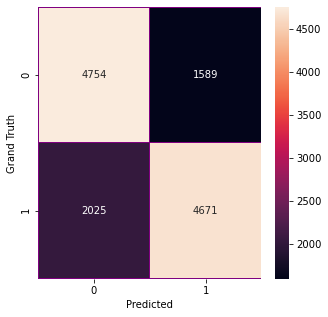

In [44]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

### F1 Score 

In [45]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
pd.DataFrame([[Precision, Recall, F1_Score]],columns=["Precision", "Recall", "F1 Score"], index=["Results"])

,Precision,Recall,F1 Score
Results,0.746166,0.697581,0.721056


1. High precision relates to the low false positive rate
1. High recall relates to the low false negative rate

In [46]:
import pickle
pickle.dump(logreg_best, open("Cardiovascular_Disease_model.sav", 'wb'))

In [47]:
import joblib
loaded_model = joblib.load("Cardiovascular_Disease_model.sav")

In [48]:
y_pred = loaded_model.predict(x_test)

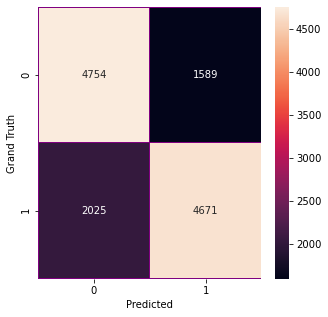

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

### Custom input for trained model 
- x1 for person not having Cardiovascular
- x2 for person having Cardiovascular

In [1]:
import joblib
loaded_model = joblib.load("Cardiovascular_Disease_model.sav")

In [2]:
x1=[[17474,1,156,56.0,100,60,1,1,0,0,0,23.011177]]
print(loaded_model.predict(x1))

[1]


In [3]:
type(x1)

list

In [4]:
x2=[[20228,1,156,85.0,140,90,3,1,0,0,1,1]]
print(loaded_model.predict(x2))

[1]
